In [1]:
import pandas as pd
import numpy as np
import scipy as sp
#pip install chart-studio
from chart_studio.plotly import iplot

In [2]:
import plotly.graph_objs as go

In [3]:
#pip install cufflinks
import cufflinks as cf


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.as_node_interactivity = "all"

In [5]:
pd.options.display.max_columns = 100

In [6]:
import os
os.chdir("E:\\Prasad\\Deloitte\\")

In [8]:
data = pd.read_csv("50-Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


In [9]:
from plotly.offline import iplot,init_notebook_mode
init_notebook_mode(connected = True)
cf.go_offline(connected  =True)

cf.set_config_file(world_readable = True,theme="pearl")

<AxesSubplot:>

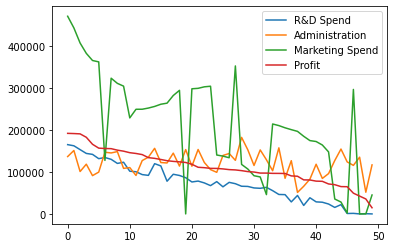

In [10]:
data.plot()

In [13]:
data.iplot(mode="lines+markers",opacity = 0.8,size= 8,symbol= 3,
           text= "State",xTitle = "no of record",yTitle="Amount Spend",title="Startup company")

In [14]:
data.iplot(x= "Profit",mode="lines+markers",opacity = 0.8,size= 8,symbol= 3,
           text= "State",xTitle = "Profit",yTitle="Amount Spend",title="Startup company")

In [15]:
data[:20].iplot(mode="lines+markers",opacity = 0.8,size= 8,symbol= 3,
           text= "State",xTitle = "no of record",yTitle="Amount Spend",title="Startup company")

In [16]:
data.iplot(kind = "hist")

In [17]:
data.iplot(kind = "hist",linecolor= "black",bins = 24,histnorm = 'percent',bargap = 0.1,barmode = 'group',opacity = 0.8,size= 8,symbol= 3,
           text= "State",xTitle = "no of record",yTitle="Percentage",title="Startup company")

In [18]:
data.iplot(kind = "box")

In [19]:
data[["State","Profit"]].pivot(columns="State",values = "Profit").iplot(kind = 'box')

In [20]:
data[["R&D Spend","Profit"]].pivot(columns="R&D Spend",values = "Profit").iplot(kind = 'box')

In [22]:
import plotly.express as px

In [23]:
fig = px.scatter(data,x= "Marketing Spend",y="Profit")
fig.show()

In [24]:
fig = px.scatter(data,x= "Administration",y="Profit")
fig.show()

In [25]:
data.iplot(x= "Profit",mode = "markers",text = "State")

In [26]:
import plotly.figure_factory as ff

figure = ff.create_scatterplotmatrix(data[["R&D Spend","Administration","Marketing Spend","Profit","State"]],height  =1000,
                                    width = 1000,text = data["State"],diag = "histogram",index="State")

iplot(figure)

In [27]:
fig = px.pie(data,values = "R&D Spend",names = "State")
fig.show()

In [33]:
colors = ["Greys","YlGnBu","Greens","YlOrRd"]

corrs = data.corr()
figure = ff.create_annotated_heatmap(z= corr.values,x= list(corr.columns),y=list(corr.index),
                                     colorscale = "Earth",annotation_text = corrs.round(2).
                                     values,showscale = True, reversescale =True)

#figure.layout.margin = dict(1=200,t =200)
figure.layout.height =800
figure.layout.width = 1000

iplot(figure)